### Imports - импортируем все необходимое

In [1]:
#!pip install catboost

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
##from catboost import CatBoostRegressor


In [35]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization
#from keras.engine.sequential import Sequential

print(tf.__version__)


2.16.1


### Data extraction - загружаем датасет из его исходных файлов

In [37]:
df1 = pd.read_excel('/Users/Marina/Desktop/Учеба/ВКР/Датасет для ВКР_композиты/X_bp.xlsx', index_col=0)
df2 = pd.read_excel('/Users/Marina/Desktop/Учеба/ВКР/Датасет для ВКР_композиты/X_nup.xlsx', index_col=0)# экспортируем файлы и прсваиваем индекс колонки , которая уже есть)


In [38]:
df1. tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342


In [39]:
df2.tail()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479
1039,90,9.021043,66.920143


### Data exploration - смотрим примеры данных, анализируем, что может быть полезно для нас

In [40]:
df1.info() # пропусков данных нет

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [41]:
df2.info() #пропусков нет

<class 'pandas.core.frame.DataFrame'>
Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [42]:
df1.describe() #данные сильно различаются между собой по абсолютной величине

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [43]:
df1.nunique() #практически все уникальные значения

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [44]:
#смотрим неуникальные строчки (слишком подозрительно одинаковое количество уникальных)
duplicateRows = df1[df1.duplicated(['Содержание эпоксидных групп,%_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])]
print(duplicateRows)

    Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
4                          2.771331            2030.0                  753.0   
5                          2.767918            2000.0                  748.0   
6                          2.569620            1910.0                  807.0   
10                         2.919678            2160.0                  933.0   
11                         2.877358            1990.0                 1628.0   
13                         2.919678            1980.0                  568.0   
14                         4.029126            1910.0                  800.0   
15                         2.934783            2030.0                  302.0   
16                         3.557018            1880.0                  313.0   
17                         4.193548            1950.0                  506.0   
18                         4.897959            1890.0                  540.0   
20                         2.877358     

In [45]:
df1.iloc[['4','5','6','10','11','13','14','15','16','17','18','20']] # подозрительные данные (подумать)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
4,2.771331,2030.0,753.0,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0
5,2.767918,2000.0,748.0,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0
6,2.569620,1910.0,807.0,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0
10,2.919678,2160.0,933.0,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0
11,2.877358,1990.0,1628.0,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0
13,2.919678,1980.0,568.0,129.00,21.250000,300.000000,470.0,73.333333,2455.555556,220.0
14,4.029126,1910.0,800.0,129.00,21.250000,300.000000,470.0,73.333333,2455.555556,220.0
15,2.934783,2030.0,302.0,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0
16,3.557018,1880.0,313.0,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0
17,4.193548,1950.0,506.0,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0


In [46]:
df2.nunique() # Угол нашивки используется два показателя, после нормализации проверить есть ли смысл перевести из категориальных данных

Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

In [47]:
# в двух датасетах пропусков нет, данные int64,float64 -числа, преобразований в численный тип не требуется. 

In [48]:
#объединяем два датасета
df = df1.join(df2)
df.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,90,6.078902,77.434468


In [49]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

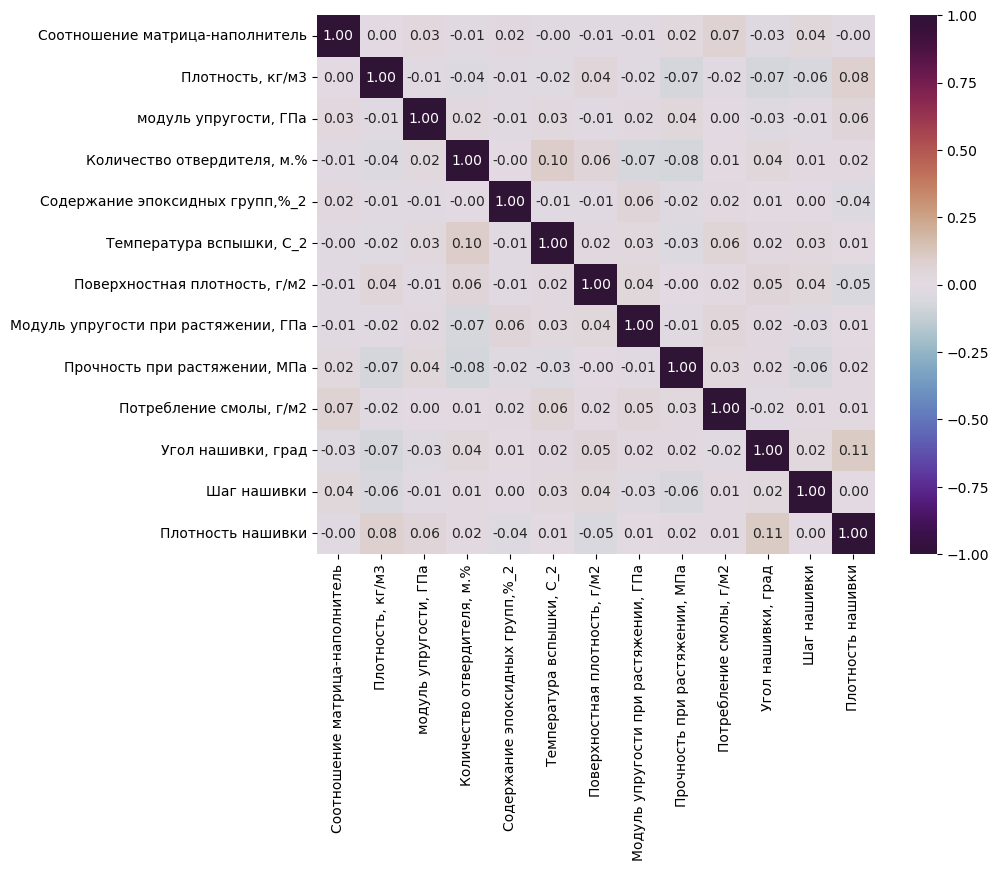

In [51]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted')
plt.show()

In [52]:
df.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


In [53]:
# нет совсем зависимости от переменных, это печально

In [54]:
sns.pairplot(df[numeric])

NameError: name 'numeric' is not defined

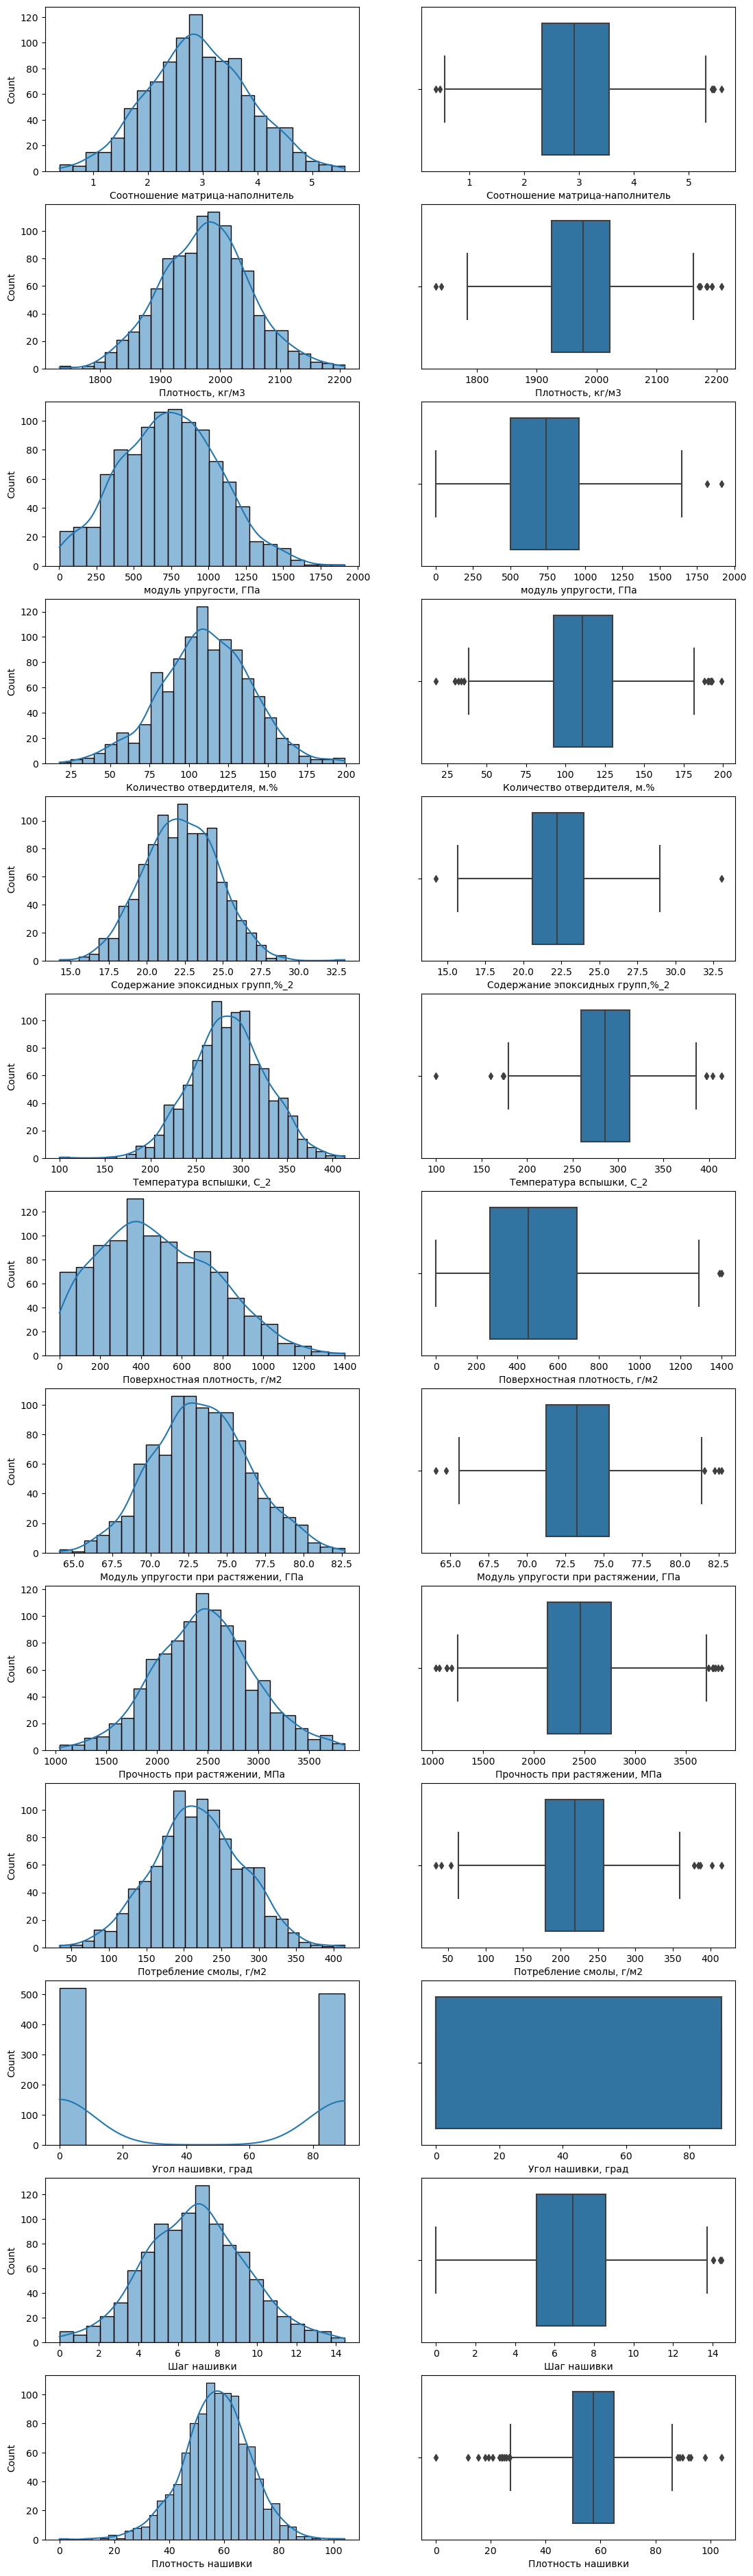

In [55]:
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

In [56]:
# все показатели распределены нормально, поэтому можно применить и стандартизацию и нормализацию данных
# присутствуют выбросы, определяем кол-во выбросов и думаем нужно ли их удалить или заменить на Nan

In [57]:
# для определения выбросов используем два метода: метод 3-сигм и метод межквартильных расстояний

Соотношение матрица-наполнитель: 3s=0 iq=6


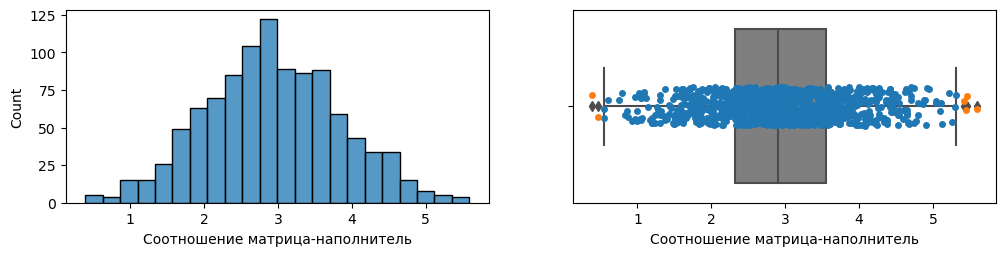

Плотность, кг/м3: 3s=3 iq=9


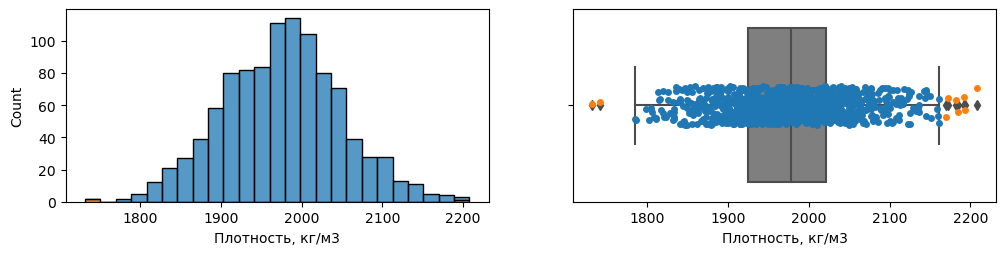

модуль упругости, ГПа: 3s=2 iq=2


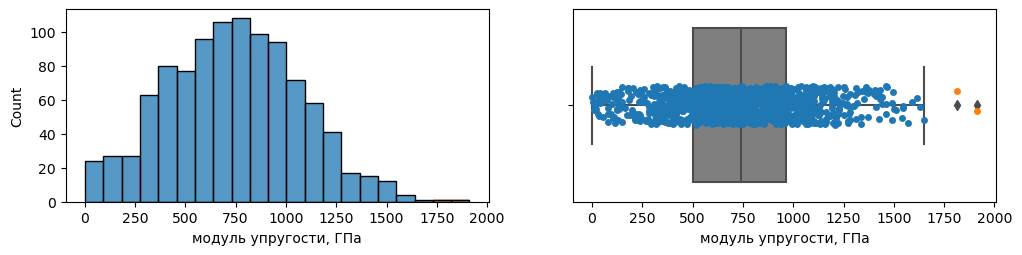

Количество отвердителя, м.%: 3s=2 iq=14


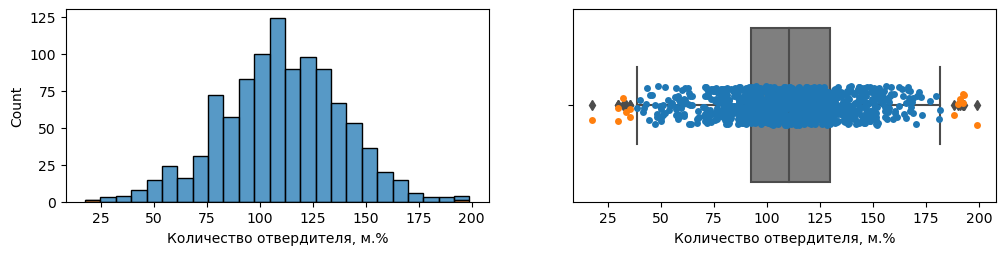

Содержание эпоксидных групп,%_2: 3s=2 iq=2


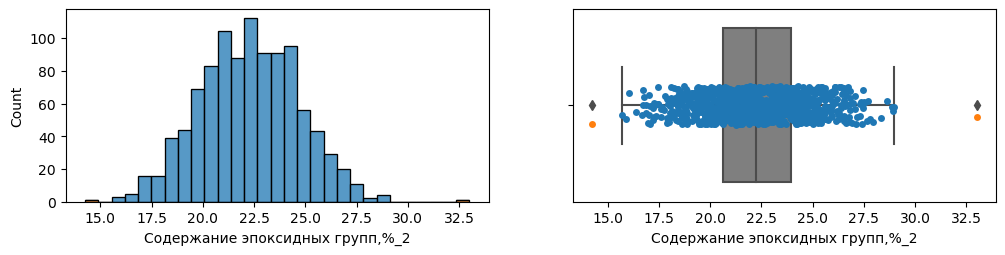

Температура вспышки, С_2: 3s=3 iq=8


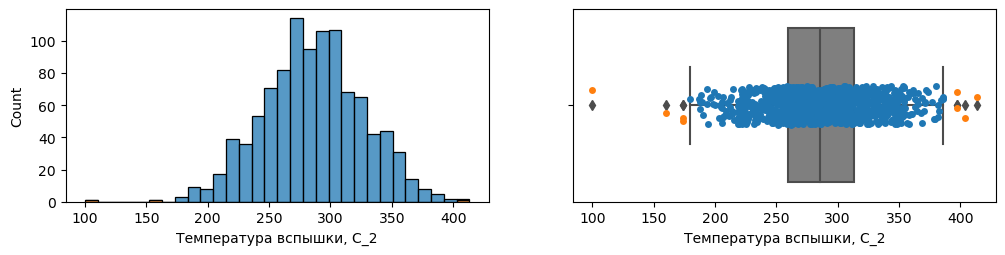

Поверхностная плотность, г/м2: 3s=2 iq=2


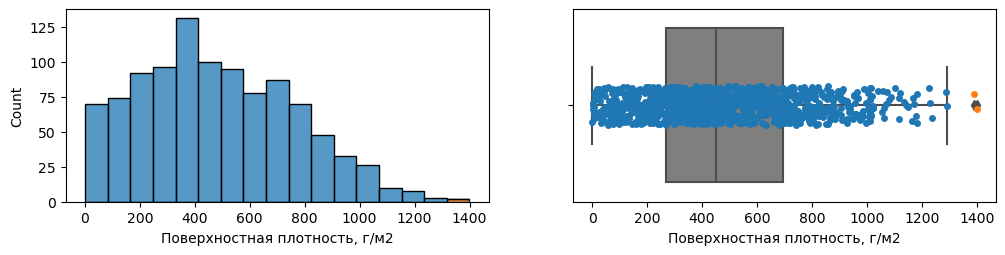

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


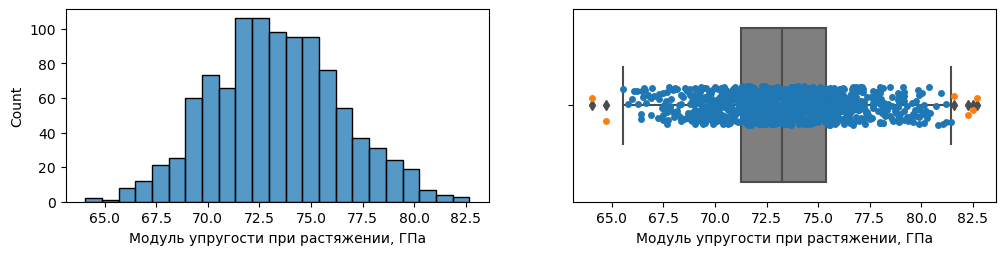

Прочность при растяжении, МПа: 3s=0 iq=11


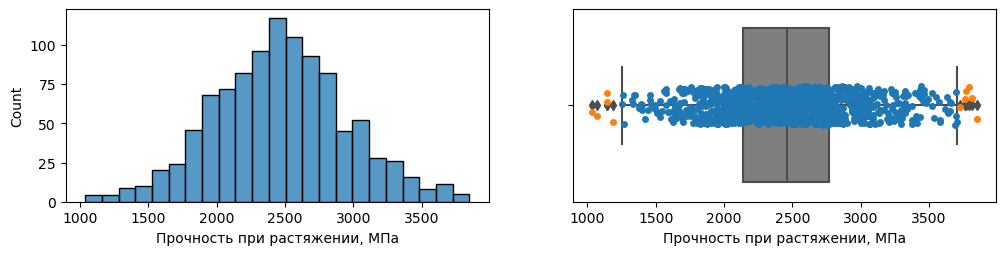

Потребление смолы, г/м2: 3s=3 iq=8


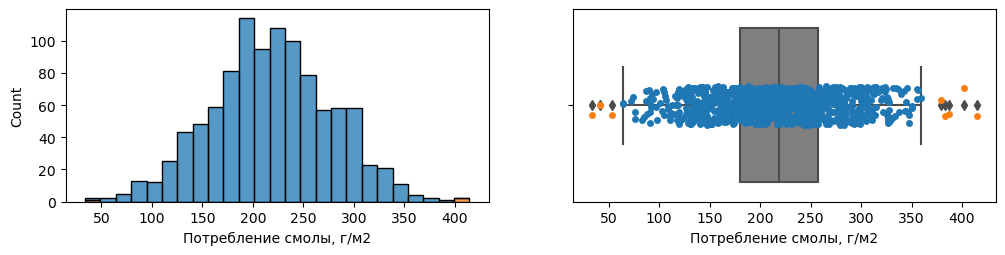

Угол нашивки, град: 3s=0 iq=0


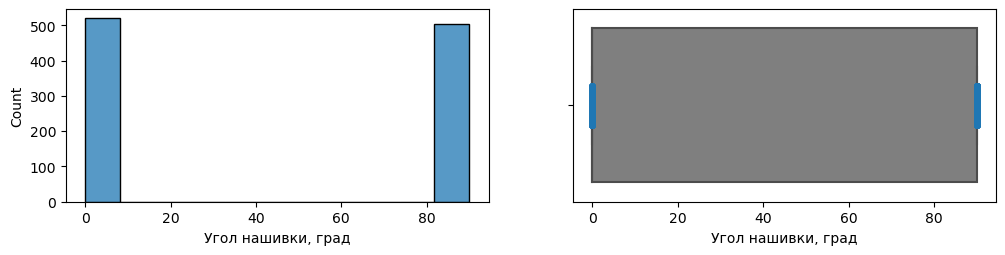

Шаг нашивки: 3s=0 iq=4


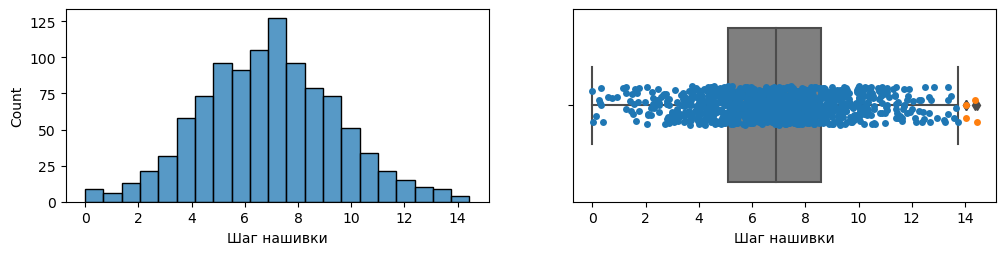

Плотность нашивки: 3s=7 iq=21


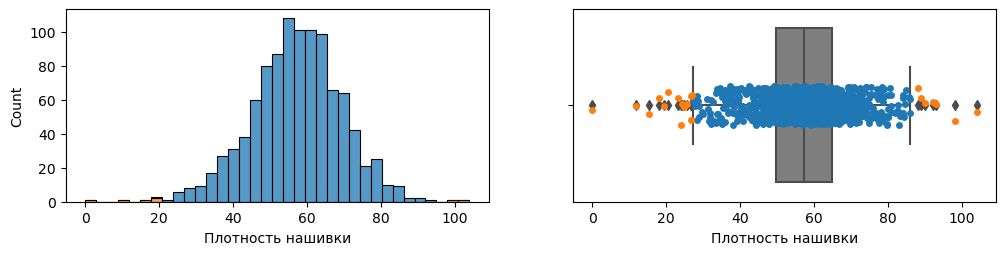

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [58]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], .25)
    q3 = np.quantile(df[column], .75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] < lower) | (df[column] > upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()
 
print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [59]:
# т.к. данные распределены нормально, можно удалить выбросы, обнаруженные методом 3-сигм

In [60]:
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [61]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

### Разбиваем данные на признаки и таргеты

In [62]:
# Разбиваем датасет на цель (y) и входные данные (X)
# создали переменную у и убрали из датасета ее, так как собираемся предсказывать
y1 = df['Модуль упругости при растяжении, ГПа'].copy()
y2=df['Прочность при растяжении, МПа'].copy()
df_old=df.copy()
df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=True)
X=df.copy()

In [63]:
y2.describe()

count    1000.000000
mean     2464.864198
std       485.015353
min      1036.856605
25%      2134.535871
50%      2456.394188
75%      2760.163022
max      3848.436732
Name: Прочность при растяжении, МПа, dtype: float64

### Нормализация данных

In [64]:
min_max_scaler = MinMaxScaler()
ds_norm=min_max_scaler.fit_transform(np.array(X))
ds_norm[:1]

array([[0.28213084, 0.60138107, 0.44706097, 0.12304725, 0.60743528,
        0.48282339, 0.16223008, 0.51741812, 0.        , 0.27510888,
        0.54465195]])

In [65]:
df_norm=pd.DataFrame(data=ds_norm, columns=['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'])
df_norm.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.517418,0.0,0.344539,0.682789


In [66]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  1000 non-null   float64
 1   Плотность, кг/м3                 1000 non-null   float64
 2   модуль упругости, ГПа            1000 non-null   float64
 3   Количество отвердителя, м.%      1000 non-null   float64
 4   Содержание эпоксидных групп,%_2  1000 non-null   float64
 5   Температура вспышки, С_2         1000 non-null   float64
 6   Поверхностная плотность, г/м2    1000 non-null   float64
 7   Потребление смолы, г/м2          1000 non-null   float64
 8   Угол нашивки, град               1000 non-null   float64
 9   Шаг нашивки                      1000 non-null   float64
 10  Плотность нашивки                1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [67]:
df_norm['Угол нашивки, град'].unique ()

array([0., 1.])

In [68]:
# Категориальные данные при нормализации преобразовались в 0 и 1 и можно не применять One Hot Encoding

In [69]:
X_norm=df_norm
X_norm.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.517418,0.0,0.344539,0.682789


In [70]:
###Разбиваем датасет на train/val, в тест уходит 30%, в трейн все остальное

In [71]:
# Разбиваем датасет на train/test , насколько хорошо идет обучение модели проверяем
# в тест уходит 30%, в трейн все остальное
X1_train_full, X1_test_full, y1_train, y1_test = train_test_split(X_norm, y1, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=0)
X2_train_full, X2_test_full, y2_train, y2_test = train_test_split(X_norm, y2, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=0)

In [72]:
#  промежуточная проверка что осталось у нас, не удалили ли лишнего
print(len(X_norm.columns), len(X1_train_full.columns))
X1_train_full.shape, X2_train_full.shape

11 11


((700, 11), (700, 11))

### Model

In [138]:
### 1.Модель LinearRegression

In [139]:
regressor1_1 = LinearRegression()
regressor1_2 = LinearRegression()

In [140]:
regressor1_1.fit(X1_train_full, y1_train)
regressor1_2.fit(X2_train_full, y2_train)

LinearRegression()

In [141]:
y1_pred = regressor1_1.predict(X1_test_full)
y2_pred = regressor1_2.predict(X2_test_full)
prediction_df1_1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
prediction_df1_2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
prediction_df1_1.head(3) 

,Actual,Predicted
1016,76.030555,73.610024
881,69.612618,73.327791
308,74.782273,73.556572


In [142]:
prediction_df1_2.head(3)

,Actual,Predicted
1016,2466.925422,2432.912934
881,2152.127763,2507.266588
308,2004.835606,2395.645154


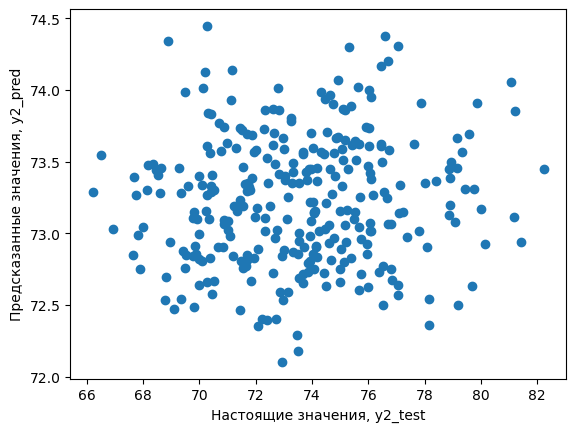

In [143]:
plt.scatter(y1_test, y1_pred)
plt.xlabel("Настоящие значения, y2_test")
plt.ylabel("Предсказанные значения, y2_pred")
plt.show()

In [144]:
print('MAE1:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MAE2:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE1:', metrics.mean_squared_error(y1_test, y1_pred))
print('MSE2:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE1:', 
      np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('RMSE2:', 
      np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE1: 2.510988573485007
MAE2: 396.4602777567391
MSE1: 9.627009630053339
MSE2: 240591.3195815352
RMSE1: 3.1027422758027035
RMSE2: 490.5010902959699


In [145]:
#соберем оценки в один датафрейм
loss1=pd.DataFrame({'model': ['LinearRegression'],
 'MAE': [metrics.mean_absolute_error(y1_test, y1_pred)],
 'MSE': [metrics.mean_squared_error(y1_test, y1_pred)], 'RMSE':[np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))]})
loss2=pd.DataFrame({'model': ['LinearRegression'],
 'MAE': [metrics.mean_absolute_error(y2_test, y2_pred)],
 'MSE': [metrics.mean_squared_error(y2_test, y2_pred)], 'RMSE':[np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))]})
loss1

,model,MAE,MSE,RMSE
0,LinearRegression,2.510989,9.62701,3.102742


In [146]:
#2.Random Forest Regressor

In [147]:
#regressor2_1 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
#regressor2_2 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
regressor2_1 = RandomForestRegressor(n_estimators=100, random_state=0)
regressor2_2 = RandomForestRegressor(n_estimators=100, random_state=0)

In [148]:
regressor2_1.fit(X1_train_full, y1_train)
regressor2_2.fit(X2_train_full, y2_train)

RandomForestRegressor(random_state=0)

In [149]:
y1_pred = regressor2_1.predict(X1_test_full)
y2_pred = regressor2_2.predict(X2_test_full)
prediction_df2_1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
prediction_df2_2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
prediction_df2_1.head(3) 

,Actual,Predicted
1016,76.030555,73.464754
881,69.612618,72.998130
308,74.782273,73.819810


In [150]:
prediction_df2_2.head(3)

,Actual,Predicted
1016,2466.925422,2305.129399
881,2152.127763,2379.454938
308,2004.835606,2453.980845


In [151]:
print('MAE1:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MAE2:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE1:', metrics.mean_squared_error(y1_test, y1_pred))
print('MSE2:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE1:', 
      np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('RMSE2:', 
      np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE1: 2.5452922074036435
MAE2: 401.4085783602079
MSE1: 9.998720392535194
MSE2: 244983.4114017384
RMSE1: 3.1620753299906053
RMSE2: 494.9579895321808


In [152]:
loss1.loc[ len(loss1.index )] = ['Random Forest Regressor', metrics.mean_absolute_error(y1_test, y1_pred), metrics.mean_squared_error(y1_test, y1_pred),np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))]
loss2.loc[ len(loss2.index )] = ['Random Forest Regressor', metrics.mean_absolute_error(y2_test, y2_pred), metrics.mean_squared_error(y2_test, y2_pred),np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))]

In [153]:
# 3.KNN

In [154]:
grid = {'n_neighbors': range(1, 50, 1)}
gs = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = grid , cv = 10)
gs.fit(X1_train_full, y1_train)
gs_model = gs.best_estimator_
print(gs.best_params_)

{'n_neighbors': 37}


In [155]:
grid = {'n_neighbors': range(1, 50, 1)}
gs = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = grid , cv = 10)
gs.fit(X2_train_full, y2_train)
gs_model = gs.best_estimator_
print(gs.best_params_)

{'n_neighbors': 32}


In [156]:
regressor3_1 = KNeighborsRegressor(n_neighbors=37, metric='euclidean')
regressor3_2 = KNeighborsRegressor(n_neighbors=32, metric='euclidean')

In [157]:
regressor3_1.fit(X1_train_full, y1_train)
regressor3_2.fit(X2_train_full, y2_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=32)

In [158]:
y1_pred = regressor3_1.predict(X1_test_full)
y2_pred = regressor3_2.predict(X2_test_full)
prediction_df3_1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
prediction_df3_2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
prediction_df3_1.head(3) 

,Actual,Predicted
1016,76.030555,73.726950
881,69.612618,73.913079
308,74.782273,72.907995


In [159]:
prediction_df3_2.head(3)

,Actual,Predicted
1016,2466.925422,2541.385368
881,2152.127763,2534.524939
308,2004.835606,2480.147114


In [160]:
print('MAE1:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MAE2:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE1:', metrics.mean_squared_error(y1_test, y1_pred))
print('MSE2:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE1:', 
      np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('RMSE2:', 
      np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE1: 2.5339460921134798
MAE2: 393.6412329712986
MSE1: 9.853972019776053
MSE2: 244255.27847969995
RMSE1: 3.139103696881652
RMSE2: 494.22189194702815


In [161]:
loss1.loc[ len(loss1.index )] = ['KNN', metrics.mean_absolute_error(y1_test, y1_pred), metrics.mean_squared_error(y1_test, y1_pred),np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))]
loss2.loc[ len(loss2.index )] = ['KNN', metrics.mean_absolute_error(y2_test, y2_pred), metrics.mean_squared_error(y2_test, y2_pred),np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))]

In [162]:
# 4. Ridge

In [163]:
regressor4_1 = Ridge(alpha=0.1)
regressor4_2 = Ridge(alpha=0.1)

In [164]:
regressor4_1.fit(X1_train_full, y1_train)
regressor4_2.fit(X2_train_full, y2_train)

Ridge(alpha=0.1)

In [165]:
y1_pred = regressor4_1.predict(X1_test_full)
y2_pred = regressor4_2.predict(X2_test_full)
prediction_df4_1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
prediction_df4_2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
prediction_df4_1.head(3) 

,Actual,Predicted
1016,76.030555,73.608862
881,69.612618,73.327702
308,74.782273,73.554187


In [166]:
prediction_df4_2.head(3)

,Actual,Predicted
1016,2466.925422,2433.151274
881,2152.127763,2507.220696
308,2004.835606,2395.824181


In [167]:
print('MAE1:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MAE2:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE1:', metrics.mean_squared_error(y1_test, y1_pred))
print('MSE2:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE1:', 
      np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('RMSE2:', 
      np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE1: 2.510996196598246
MAE2: 396.4517916687339
MSE1: 9.627008320646459
MSE2: 240599.5174006836
RMSE1: 3.102742064794697
RMSE2: 490.50944680065396


In [168]:
loss1.loc[ len(loss1.index )] = ['Ridge', metrics.mean_absolute_error(y1_test, y1_pred), metrics.mean_squared_error(y1_test, y1_pred),np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))]
loss2.loc[ len(loss2.index )] = ['Ridge', metrics.mean_absolute_error(y2_test, y2_pred), metrics.mean_squared_error(y2_test, y2_pred),np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))]

In [169]:
#5 SVR

In [170]:
regressor5_1 = SVR(kernel='linear')
regressor5_2 = SVR(kernel='linear')

In [171]:
regressor5_1.fit(X1_train_full, y1_train)
regressor5_2.fit(X2_train_full, y2_train)

SVR(kernel='linear')

In [172]:
y1_pred = regressor5_1.predict(X1_test_full)
y2_pred = regressor5_2.predict(X2_test_full)
prediction_df5_1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
prediction_df5_2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
prediction_df5_1.head(3) 

,Actual,Predicted
1016,76.030555,73.583066
881,69.612618,73.414985
308,74.782273,73.906528


In [173]:
prediction_df5_2.head(3)

,Actual,Predicted
1016,2466.925422,2465.746155
881,2152.127763,2468.565261
308,2004.835606,2457.305480


In [174]:
print('MAE1:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MAE2:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE1:', metrics.mean_squared_error(y1_test, y1_pred))
print('MSE2:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE1:', 
      np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('RMSE2:', 
      np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE1: 2.5224116622775363
MAE2: 395.70186129740256
MSE1: 9.741861719226495
MSE2: 244643.92246187894
RMSE1: 3.1211955592731604
RMSE2: 494.6149234120205


In [175]:
loss1.loc[ len(loss1.index )] = ['SVR', metrics.mean_absolute_error(y1_test, y1_pred), metrics.mean_squared_error(y1_test, y1_pred),np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))]
loss2.loc[ len(loss2.index )] = ['SVR', metrics.mean_absolute_error(y2_test, y2_pred), metrics.mean_squared_error(y2_test, y2_pred),np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))]

In [176]:
loss1

,model,MAE,MSE,RMSE
0,LinearRegression,2.510989,9.627010,3.102742
1,Random Forest Regressor,2.545292,9.998720,3.162075
2,KNN,2.533946,9.853972,3.139104
3,Ridge,2.510996,9.627008,3.102742
4,SVR,2.522412,9.741862,3.121196


In [177]:
loss2

,model,MAE,MSE,RMSE
0,LinearRegression,396.460278,240591.319582,490.501090
1,Random Forest Regressor,401.408578,244983.411402,494.957990
2,KNN,393.641233,244255.278480,494.221892
3,Ridge,396.451792,240599.517401,490.509447
4,SVR,395.701861,244643.922462,494.614923


### Разбиваем данные на признаки и таргеты для соотношения матрица-наполнитель

In [225]:
# Разбиваем датасет на цель (y) и входные данные (X)
# создали переменную у и убрали из датасета ее, так как собираемся предстказывать
df=df_old
y3 = df['Соотношение матрица-наполнитель'].copy()
df_old=df.copy()
df.drop(['Соотношение матрица-наполнитель'], axis=1, inplace=True)
X3=df.copy()

In [226]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      1000 non-null   float64
 1   модуль упругости, ГПа                 1000 non-null   float64
 2   Количество отвердителя, м.%           1000 non-null   float64
 3   Содержание эпоксидных групп,%_2       1000 non-null   float64
 4   Температура вспышки, С_2              1000 non-null   float64
 5   Поверхностная плотность, г/м2         1000 non-null   float64
 6   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 7   Прочность при растяжении, МПа         1000 non-null   float64
 8   Потребление смолы, г/м2               1000 non-null   float64
 9   Угол нашивки, град                    1000 non-null   int64  
 10  Шаг нашивки                           1000 non-null   float64
 11  Плотность нашивки     

In [227]:
y3.describe()

count    1000.000000
mean        2.936299
std         0.908779
min         0.389403
25%         2.319283
50%         2.908811
75%         3.553931
max         5.591742
Name: Соотношение матрица-наполнитель, dtype: float64

In [228]:
### Нормализация данных

In [229]:
min_max_scaler = MinMaxScaler()
ds_norm=min_max_scaler.fit_transform(np.array(X3))
ds_norm[:1]

array([[0.60138107, 0.44706097, 0.12304725, 0.60743528, 0.48282339,
        0.16223008, 0.31919382, 0.69823491, 0.51741812, 0.        ,
        0.27510888, 0.54465195]])

In [230]:
df_norm=pd.DataFrame(data=ds_norm, columns=['Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'])
df_norm.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.275109,0.544652
1,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.365074
2,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.503211
3,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.544652
4,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.682789


In [231]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      1000 non-null   float64
 1   модуль упругости, ГПа                 1000 non-null   float64
 2   Количество отвердителя, м.%           1000 non-null   float64
 3   Содержание эпоксидных групп,%_2       1000 non-null   float64
 4   Температура вспышки, С_2              1000 non-null   float64
 5   Поверхностная плотность, г/м2         1000 non-null   float64
 6   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 7   Прочность при растяжении, МПа         1000 non-null   float64
 8   Потребление смолы, г/м2               1000 non-null   float64
 9   Угол нашивки, град                    1000 non-null   float64
 10  Шаг нашивки                           1000 non-null   float64
 11  Плотность нашивки 

In [232]:
df_norm['Угол нашивки, град'].unique ()

array([0., 1.])

In [233]:
X3_norm=df_norm
X3_norm.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.275109,0.544652
1,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.365074
2,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.503211
3,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.544652
4,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.682789


In [234]:
# Разбиваем датасет на train/test , насколько хорошо идет обучение модели проверяем
# в тест уходит 30%, в трейн все остальное
X3_train_full, X3_test_full, y3_train, y3_test = train_test_split(X3_norm, y3, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=0)

In [235]:
#  промежуточная проверка что осталось у нас, не удалили ли лишнего
print(len(X3_norm.columns), len(X3_train_full.columns))
X3_train_full.shape, X3_train_full.shape

12 12


((700, 12), (700, 12))

# Нейросеть

In [267]:
# 6.MLPRegressor

model6 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 16, 16, 1),
    activation = 'relu',
    solver='adam',
    max_iter=100,
    early_stopping = True,
    validation_fraction = 0.3,
    verbose=True
)

In [268]:
%%time
# Запускаю нейросеть
model6.fit(X3_train_full, y3_train)

Iteration 1, loss = 3.00307056
Validation score: -6.992467
Iteration 2, loss = 2.93683513
Validation score: -6.777515
Iteration 3, loss = 2.84736093
Validation score: -6.493060
Iteration 4, loss = 2.73821149
Validation score: -6.202198
Iteration 5, loss = 2.62617334
Validation score: -5.895826
Iteration 6, loss = 2.50636400
Validation score: -5.556548
Iteration 7, loss = 2.37461880
Validation score: -5.169881
Iteration 8, loss = 2.21655837
Validation score: -4.697150
Iteration 9, loss = 2.02990589
Validation score: -4.153221
Iteration 10, loss = 1.82251486
Validation score: -3.552531
Iteration 11, loss = 1.59032868
Validation score: -2.888624
Iteration 12, loss = 1.33846445
Validation score: -2.171572
Iteration 13, loss = 1.07062872
Validation score: -1.434285
Iteration 14, loss = 0.80785280
Validation score: -0.743570
Iteration 15, loss = 0.57835951
Validation score: -0.218958
Iteration 16, loss = 0.45426284
Validation score: -0.003210
Iteration 17, loss = 0.44277667
Validation score:

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 16, 16, 1), max_iter=100,
             validation_fraction=0.3, verbose=True)

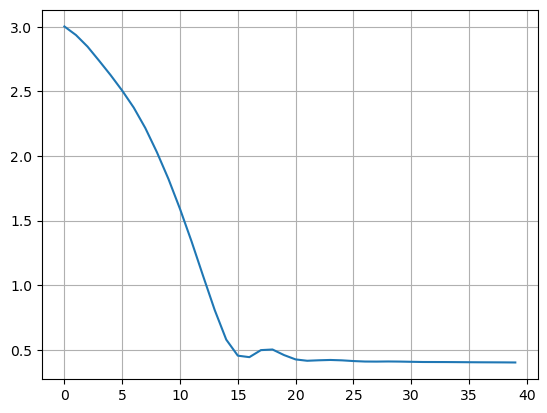

In [269]:
# График ошибки
plt.plot(model6.loss_curve_)
plt.grid(True)
plt.show()

In [270]:
# Предсказание нейросети
y3_pred = model6.predict(X3_test_full)
prediction_df6 = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
prediction_df6.head(3) 

,Actual,Predicted
0,3.745862,3.004632
1,4.864317,2.978732
2,2.187945,2.784071


In [271]:
print('MAE3:', metrics.mean_absolute_error(y3_test, y3_pred))
print('MSE3:', metrics.mean_squared_error(y3_test, y3_pred))
print('RMSE3:', 
      np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

MAE3: 0.763727901509488
MSE3: 0.8869573826689824
RMSE3: 0.9417841486609245


In [272]:
### Модель Sequential

In [273]:
#архитектура модели
  

model_ns = tf.keras.Sequential()                

model_ns.add(Dense(16, input_dim=X3_train_full.shape[1], activation = 'tanh'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(8, activation = 'relu'))
model_ns.add(Dense(8, activation = 'relu'))
model_ns.add(Dense(1, activation = 'linear'))


#компиляция
model_ns.compile(optimizer='adam', loss= 'mae', metrics=['mae'])
model_ns.summary()

#обучение модели
%time
history = model_ns.fit(X3_train_full, y3_train,
                    epochs=65,
                    batch_size = 32,
                    verbose=1,
                    validation_data=(X3_test_full, y3_test))    



/Users/Marina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489 (1.91 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 32 (128.00 B)

CPU times: user 9 µs, sys: 10 µs, total: 19 µs
Wall time: 37.9 µs
Epoch 1/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.6664 - mae: 2.6665 - val_loss: 2.8269 - val_mae: 2.7925
Epoch 2/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4248 - mae: 2.4247 - val_loss: 2.6282 - val_mae: 2.5925
Epoch 3/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9020 - mae: 1.9021 - val_loss: 2.3295 - val_mae: 2.2924
Epoch 4/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3273 - mae: 1.3271 - val_loss: 1.9714 - val_mae: 1.9347
Epoch 5/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0558 - mae: 1.0557 - val_loss: 1.6724 - val_mae: 1.6382
Epoch 6/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8194 - mae: 0.8192 - val_loss: 1.5074 - val_mae: 1.4750
Epoch 7/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7904 - mae: 0.7904 - val_loss: 1.3718 - val_mae: 1.3405
Epoch 8/65
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8080 - mae: 0.8080 - val_loss: 1.2525 - val_mae: 1.2210
Epoch

In [274]:
### Визуализация

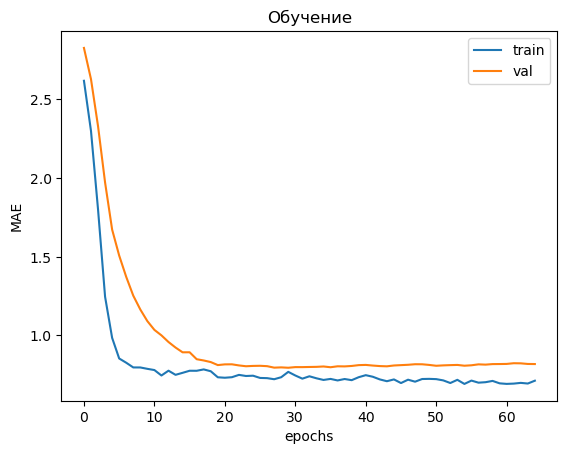

In [275]:
#визуализируем процесс обучения
plt.title('Обучение')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.plot(history.history['loss'], label= 'train')
plt.plot(history.history['val_loss'], label= 'val')
plt.legend()
plt.show()

In [276]:
model_ns.evaluate(X3_test_full, y3_test, verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7899 - mae: 0.7874 


[0.8178197145462036, 0.8039903044700623]

In [277]:
# Предсказание нейросети
y3_pred = model_ns.predict(X3_test_full).flatten()
prediction_df7 = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
prediction_df7.head(3) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Actual,Predicted
0,3.745862,2.422475
1,4.864317,2.828477
2,2.187945,2.933424


In [278]:
print('MAE3:', metrics.mean_absolute_error(y3_test, y3_pred))
print('MSE3:', metrics.mean_squared_error(y3_test, y3_pred))
print('RMSE3:', 
      np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

MAE3: 0.8039902916594754
MSE3: 0.9838842524226644
RMSE3: 0.9919093972851878
